# Zindi New User Engagement Prediction Challenge

We have mutliple tables so let's try to figure out how to build a dataset

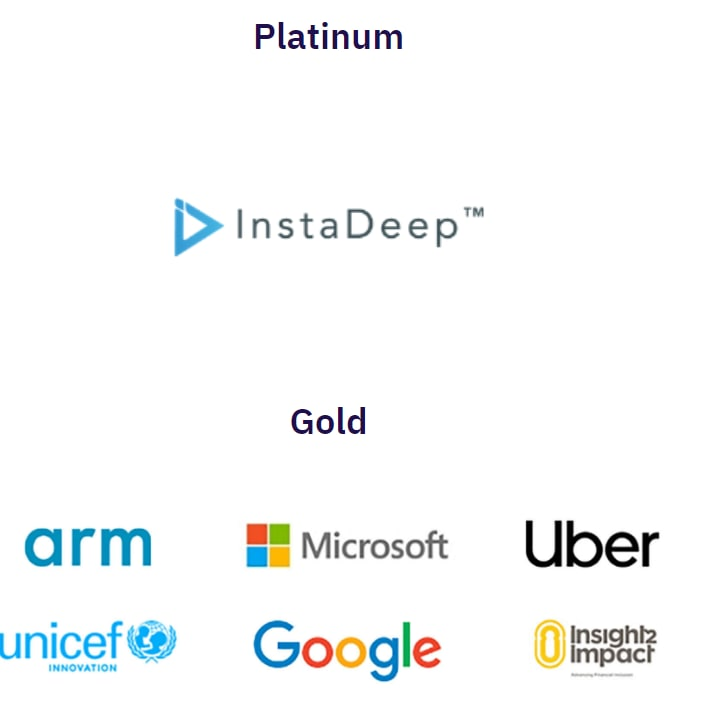

In [52]:

from IPython.display import Image
Image(filename='photo_2022-10-27_15-15-48.jpg') 

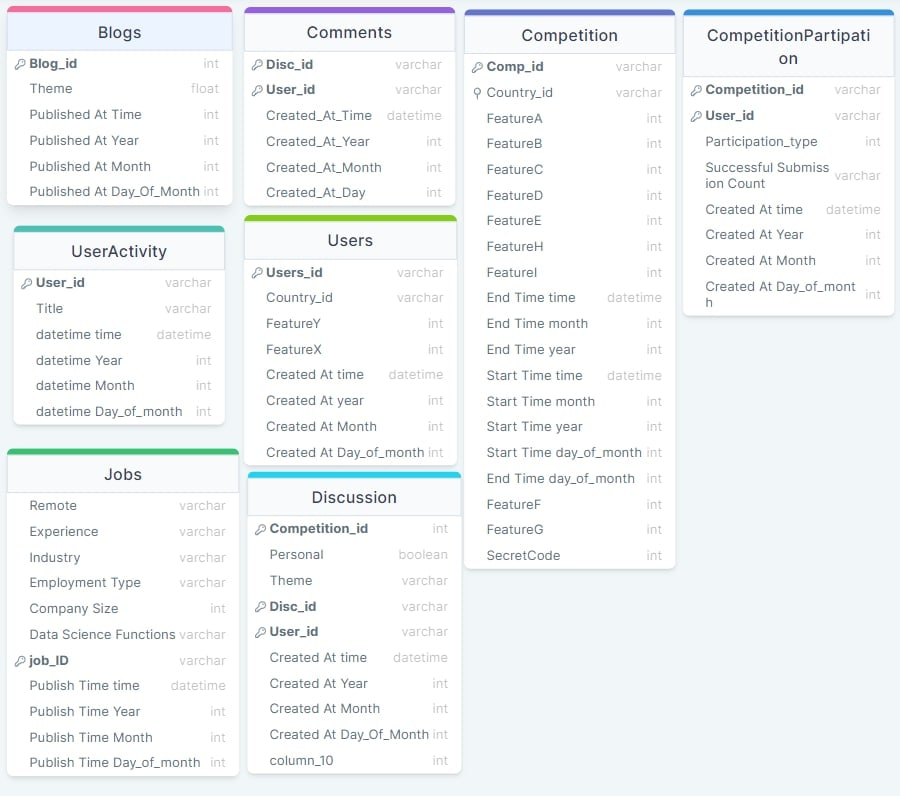

In [53]:
Image(filename='photo_2022-10-27_15-15-50.jpg') 

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# User data
user_activity_df = pd.read_csv("UserActivity.csv")
users_df = pd.read_csv("Users.csv")

# Activity data
blogs_df = pd.read_csv("Blogs.csv")
comments_df = pd.read_csv("Comments.csv")
competition_df = pd.read_csv("Competition.csv")
competition_partipation_df = pd.read_csv("CompetitionPartipation.csv")
jobs_df = pd.read_csv("Jobs.csv")

First of all let's look inside ```Users``` table. Looks like all the users here are unique.

In [2]:
users_df

,FeatureY,FeatureX,User_ID,Countries_ID,Created At time,Created At Year,Created At Month,Created At Day_of_month
0,0,0,ID_JT45778G,X9GR,12:52:28.115008,1,12,14
1,0,0,ID_JST2E746,NaN,07:47:45.923194,1,4,21
2,0,0,ID_JBATRARU,NaN,08:36:46.773862,1,4,21
3,0,0,ID_M0NYS4PB,NaN,11:33:40.628926,1,4,20
4,0,0,ID_OMAOEER0,NaN,16:28:35.956023,1,2,31
...,...,...,...,...,...,...,...,...
8931,0,0,ID_R4PDD7MY,UKC2,03:59:15.620697,1,4,10
8932,0,0,ID_CF1OPNQ5,ME75,21:25:16.299368,1,12,29
8933,0,0,ID_7PSNGF84,H801,10:03:43.201075,1,1,18
8934,1,0,ID_ZUKI8HI5,E3V2,18:00:54.828074,1,2,1


In [3]:
print(users_df.User_ID.unique().shape)

(8936,)


We see that all the users are created the same year. There is some data from months 2-3-4 and 10-11-12

In [4]:
users_df["Created At Year"].value_counts()

1    8936
Name: Created At Year, dtype: int64

In [5]:
users_df["Created At Month"].value_counts()

2     2005
3     1764
12    1735
1     1463
11    1082
4      861
10      26
Name: Created At Month, dtype: int64

Here is ```UserActivity``` table

In [6]:
user_activity_df

,User_ID,Title,datetime time,datetime Year,datetime Month,datetime Day_of_month
0,ID_RAO7ABPO,comp_ID_N5MO,10:49:58,1,11,23
1,ID_RAO7ABPO,comp_ID_N5MO,12:08:03,1,11,23
2,ID_RAO7ABPO,comp_ID_N5MO,12:09:14,1,11,23
3,ID_RAO7ABPO,comp_ID_N5MO,12:11:16,1,11,23
4,ID_RAO7ABPO,comp_ID_N5MO,12:32:13,1,11,23
...,...,...,...,...,...,...
234650,ID_CF3I4GSJ,job_ID_5ONI,08:32:58,1,4,15
234651,ID_92GNK8VB,job_ID_5ONI,17:53:54,1,4,11
234652,ID_YP6RVLKJ,job_ID_5ONI,12:46:38,1,4,19
234653,ID_9GFJ437M,job_ID_5ONI,22:12:10,1,4,7


Let's join it with ```Users``` table and filter out all activity before registration

In [7]:
user_x_activity = users_df.merge(user_activity_df, on=["User_ID"], how="left")
user_x_activity

,FeatureY,FeatureX,User_ID,Countries_ID,Created At time,Created At Year,Created At Month,Created At Day_of_month,Title,datetime time,datetime Year,datetime Month,datetime Day_of_month
0,0,0,ID_JT45778G,X9GR,12:52:28.115008,1,12,14,comp_ID_0D02,16:17:51,1.0,12.0,17.0
1,0,0,ID_JT45778G,X9GR,12:52:28.115008,1,12,14,comp_ID_0D02,14:30:36,1.0,12.0,21.0
2,0,0,ID_JT45778G,X9GR,12:52:28.115008,1,12,14,comp_ID_BARV,13:53:09,1.0,12.0,14.0
3,0,0,ID_JT45778G,X9GR,12:52:28.115008,1,12,14,comp_ID_BARV,15:59:49,1.0,12.0,14.0
4,0,0,ID_JT45778G,X9GR,12:52:28.115008,1,12,14,comp_ID_BARV,16:13:57,1.0,12.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235888,1,0,ID_ZUKI8HI5,E3V2,18:00:54.828074,1,2,1,Updated Profile,19:01:51,1.0,2.0,1.0
235889,1,0,ID_IBGWZD19,ZRXX,12:51:27.877194,1,11,7,Updated Profile,05:03:04,1.0,11.0,24.0
235890,1,0,ID_IBGWZD19,ZRXX,12:51:27.877194,1,11,7,$create_alias,14:51:27,1.0,11.0,7.0
235891,1,0,ID_IBGWZD19,ZRXX,12:51:27.877194,1,11,7,$identify,14:51:27,1.0,11.0,7.0


In [8]:
def get_incorrect_timelines(row):
    correct_year = row["Created At Year"] <= row["datetime Year"]
    correct_month = row["Created At Month"] <= row["datetime Month"]
    correct_day = row["Created At Day_of_month"] <= row["datetime Day_of_month"]
#     correct_time = pd.to_datetime(row["Created At time"]) <= pd.to_datetime(row["datetime time"])
    
    return correct_year and correct_month and correct_day

user_x_activity = user_x_activity[user_x_activity.apply(get_incorrect_timelines, axis=1)]
user_x_activity

,FeatureY,FeatureX,User_ID,Countries_ID,Created At time,Created At Year,Created At Month,Created At Day_of_month,Title,datetime time,datetime Year,datetime Month,datetime Day_of_month
0,0,0,ID_JT45778G,X9GR,12:52:28.115008,1,12,14,comp_ID_0D02,16:17:51,1.0,12.0,17.0
1,0,0,ID_JT45778G,X9GR,12:52:28.115008,1,12,14,comp_ID_0D02,14:30:36,1.0,12.0,21.0
2,0,0,ID_JT45778G,X9GR,12:52:28.115008,1,12,14,comp_ID_BARV,13:53:09,1.0,12.0,14.0
3,0,0,ID_JT45778G,X9GR,12:52:28.115008,1,12,14,comp_ID_BARV,15:59:49,1.0,12.0,14.0
4,0,0,ID_JT45778G,X9GR,12:52:28.115008,1,12,14,comp_ID_BARV,16:13:57,1.0,12.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235887,1,0,ID_ZUKI8HI5,E3V2,18:00:54.828074,1,2,1,Updated Profile,19:01:43,1.0,2.0,1.0
235888,1,0,ID_ZUKI8HI5,E3V2,18:00:54.828074,1,2,1,Updated Profile,19:01:51,1.0,2.0,1.0
235889,1,0,ID_IBGWZD19,ZRXX,12:51:27.877194,1,11,7,Updated Profile,05:03:04,1.0,11.0,24.0
235890,1,0,ID_IBGWZD19,ZRXX,12:51:27.877194,1,11,7,$create_alias,14:51:27,1.0,11.0,7.0


Let's explore our activity tables. Here we can't find any aggregatable relevant information

In [9]:
comments_df

,Disc_ID,User_ID,Created At time,Created At Year,Created At Month,Created At Day_of_month
0,ID_PTU0JO,ID_8BQTNGYG,01:18:53.960347,1,2,18
1,ID_FWGIPM,ID_8BQTNGYG,00:50:03.299989,1,2,14
2,ID_V8QUAX,ID_8BQTNGYG,00:46:57.298751,1,2,14
3,ID_WWAY33,ID_8BQTNGYG,02:53:44.504614,1,1,20
4,ID_EWT1OB,ID_8BQTNGYG,06:53:26.903374,1,2,4
...,...,...,...,...,...,...
2783,ID_O24SU4,ID_SC59RO43,11:03:52.575030,1,4,18
2784,ID_62W6UH,ID_BX3JR1XA,20:51:39.583262,1,4,20
2785,ID_N1M40F,ID_UA02ZSWR,09:27:21.364650,1,4,19
2786,ID_N1M40F,ID_XBQ1LQ7B,22:36:29.720601,1,4,19


In [10]:
blogs_df

,Theme,blog_ID,Published At time,Published At Year,Published At Month,Published At Day_of_month
0,5.0,ID_Z6MM,16:29:20.652747,5,10,23
1,5.0,ID_7IB3,11:28:07.780402,5,10,26
2,5.0,ID_JR8K,11:30:19.575654,5,10,26
3,5.0,ID_IDAV,10:34:55.071854,5,4,5
4,5.0,ID_7JVL,14:51:13.268049,5,4,5
...,...,...,...,...,...,...
123,4.0,ID_41BL,14:01:30.950198,1,3,4
124,4.0,ID_M31L,12:59:55.992321,1,3,11
125,5.0,ID_UGFQ,08:47:22.257135,1,4,1
126,2.0,ID_L41C,09:34:57.035251,1,4,8


In [11]:
competition_partipation_df

,Competition ID,Participant Type,Successful Submission Count,User_ID,Created At time,Created At Year,Created At Month,Created At Day_of_month
0,ID_IVH9,1,NaN,ID_XXWYR8KC,19:38:04.689865,1,11,20
1,ID_540G,1,NaN,ID_XXWYR8KC,19:38:04.670583,1,11,20
2,ID_BARV,1,NaN,ID_XXWYR8KC,12:06:55.884320,1,12,17
3,ID_0D02,1,count 10,ID_XXWYR8KC,11:24:04.239058,1,12,6
4,ID_IV5D,1,NaN,ID_8RNJ6AWC,15:25:34.162971,1,12,8
...,...,...,...,...,...,...,...,...
5620,ID_G5IQ,1,NaN,ID_2DGGDVLC,15:33:39.507041,1,4,7
5621,ID_84NC,1,NaN,ID_2DGGDVLC,15:34:15.045823,1,4,7
5622,ID_LFJT,1,NaN,ID_2DGGDVLC,15:46:23.330890,1,4,7
5623,ID_CNBR,1,NaN,ID_JZ6S41Q9,11:23:59.382726,1,4,5


In [12]:
competition_df

,FeatureA,FeatureB,FeatureC,FeatureD,FeatureE,SecretCode,FeatureF,FeatureG,FeatureH,FeatureI,Country_ID,Comp_ID,End Time time,End Time Year,End Time Month,End Time Day_of_month,Start Time time,Start Time Year,Start Time Month,Start Time Day_of_month
0,"[2, 4]",[14],15.0,0,2,1,[3],[],[],NaN,03GB,ID_AU0T,21:05:00,2.0,6.0,19.0,07:00:00,2,6,19
1,[1],[],3.0,0,3,1,[1],[],[1],3.0,1SUM,ID_O21T,15:30:00,2.0,2.0,15.0,12:00:00,2,2,1
2,[1],[9],2.0,0,2,1,"[1, 5]",[5],[1],2.0,D73V,ID_W6XE,21:59:00,2.0,5.0,9.0,08:00:00,2,3,28
3,[1],"[5, 6]",9.0,1,1,0,[7],[],[7],9.0,OTOG,ID_A2FN,00:00:00,3.0,10.0,2.0,00:00:00,4,6,29
4,[],[],1.0,0,2,1,[1],[4],[],NaN,NaN,ID_X0PD,12:00:00,2.0,6.0,22.0,12:00:00,2,6,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,[1],[],20.0,1,2,0,"[1, 5]",[5],[1],20.0,NaN,ID_PNHR,23:59:00,2.0,4.0,19.0,06:00:00,2,1,25
232,[1],[7],4.0,1,1,0,[1],[5],[1],4.0,NaN,ID_AS79,23:59:00,1.0,4.0,25.0,06:00:00,1,1,24
233,[1],[],NaN,0,2,1,[1],[3],[],NaN,0FT1,ID_M3G0,17:00:00,1.0,10.0,20.0,08:57:00,1,10,19
234,[1],[],2.0,0,2,0,[3],[3],[2],2.0,OTOG,ID_8DGC,23:59:00,1.0,4.0,4.0,11:00:00,1,4,2


In [13]:
jobs_df

,Remote,Experience,Industry,Employment Type,Company Size,Data Science Functions,job_ID,Publish Time time,Publish Time Year,Publish Time Month,Publish Time Day_of_month
0,NaN,2-5,"{Government,Health,""Financial Services""}",fulltime,50-200,"{""Data modelling"",""Business/Data Analysis""}",ID_VJ43,08:00:00,2.0,6.0,13.0
1,True,>5,NaN,fulltime,>200,"{""Data engineering"",""Data modelling""}",ID_ZNZV,11:00:00,1.0,3.0,30.0
2,NaN,>5,{Media},fulltime,1-10,"{""Data engineering""}",ID_PZHM,08:00:00,1.0,10.0,15.0
3,NaN,1-2,{Media},fulltime,1-10,"{""Data engineering"",""Data modelling"",""ML Appli...",ID_1PBU,08:00:00,1.0,10.0,15.0
4,NaN,1-2,NaN,fulltime,50-200,"{""Data modelling"",""Business/Data Analysis"",""Da...",ID_ZTPN,11:00:00,1.0,4.0,8.0
5,NaN,2-5,{Insurance},fulltime,50-200,"{""Data engineering"",""Data modelling"",""Business...",ID_P0AF,11:00:00,1.0,4.0,1.0
6,NaN,<1,{Location},internship,1-10,"{""Data engineering""}",ID_7YKR,06:00:00,1.0,11.0,12.0
7,True,1-2,{Security},internship,1-10,NaN,ID_147X,NaN,NaN,NaN,NaN
8,True,1-2,"{""Financial Services""}",internship,>200,"{""Data engineering"",""ML Application Deployment...",ID_5ONI,10:00:00,1.0,4.0,5.0
9,NaN,>5,{Research},fulltime,50-200,"{""Data engineering"",""ML Application Deployment...",ID_SOPZ,08:00:00,1.0,4.0,20.0


Now we will transform activity title to more meaningful feature

In [14]:
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)


user_x_activity["Title"] = user_x_activity["Title"].apply(lambda x: x.split("_")[0])

In [15]:
user_x_activity

,FeatureY,FeatureX,User_ID,Countries_ID,Created At time,Created At Year,Created At Month,Created At Day_of_month,Title,datetime time,datetime Year,datetime Month,datetime Day_of_month
0,0,0,ID_JT45778G,X9GR,12:52:28.115008,1,12,14,comp,16:17:51,1.0,12.0,17.0
1,0,0,ID_JT45778G,X9GR,12:52:28.115008,1,12,14,comp,14:30:36,1.0,12.0,21.0
2,0,0,ID_JT45778G,X9GR,12:52:28.115008,1,12,14,comp,13:53:09,1.0,12.0,14.0
3,0,0,ID_JT45778G,X9GR,12:52:28.115008,1,12,14,comp,15:59:49,1.0,12.0,14.0
4,0,0,ID_JT45778G,X9GR,12:52:28.115008,1,12,14,comp,16:13:57,1.0,12.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235887,1,0,ID_ZUKI8HI5,E3V2,18:00:54.828074,1,2,1,Updated Profile,19:01:43,1.0,2.0,1.0
235888,1,0,ID_ZUKI8HI5,E3V2,18:00:54.828074,1,2,1,Updated Profile,19:01:51,1.0,2.0,1.0
235889,1,0,ID_IBGWZD19,ZRXX,12:51:27.877194,1,11,7,Updated Profile,05:03:04,1.0,11.0,24.0
235890,1,0,ID_IBGWZD19,ZRXX,12:51:27.877194,1,11,7,$create,14:51:27,1.0,11.0,7.0


We can fill some missing countries here

In [16]:
user_x_activity.isna().sum()

FeatureY                       0
FeatureX                       0
User_ID                        0
Countries_ID               66637
Created At time                0
Created At Year                0
Created At Month               0
Created At Day_of_month        0
Title                          0
datetime time                  0
datetime Year                  0
datetime Month                 0
datetime Day_of_month          0
dtype: int64

In [17]:
user_x_activity["Countries_ID"] = user_x_activity["Countries_ID"].fillna("Miss")

The main idea of train/test split is as follows:

Train data = \[users registered in month 1, activity aggregated on month 1\] + \[users registered in month 2, activity aggregated on month 2\] \
Train labels = \[any activity on month 2\] + \[any activity on month 3\] \
\
Test data = \[users registered in month 11, activity aggregated on month 11\] \
Test labels = \[any activity on month 12\]

In [18]:
def create_data_split_from_month(dataframe, month):
    filtered_activity = dataframe[dataframe["Created At Month"] == month]
    train_data_split_activity = filtered_activity.groupby(["User_ID", "Title"])\
        .size()\
        .reset_index()\
        .pivot(index="User_ID", columns="Title")\
        .reset_index().fillna(0).reset_index(drop=True)[0]
    
    train_data_split_other = filtered_activity.groupby(["User_ID", "FeatureY", "FeatureX", "Countries_ID"])\
        .size()\
        .reset_index()\
        .drop([0], axis=1)

    train_data = pd.concat([train_data_split_other, train_data_split_activity], axis=1)
    
    filtered_activity_next_month = dataframe[dataframe["datetime Month"] == month + 1]
    active_next_month = train_data.merge(filtered_activity_next_month, on="User_ID", how="inner")
    active_next_month = set(active_next_month["User_ID"].unique())
    
    labels = train_data["User_ID"].apply(lambda x: x in active_next_month)
    
    return train_data, labels



train_data, labels = create_data_split_from_month(user_x_activity, 1)

In [19]:
train_data

,User_ID,FeatureY,FeatureX,Countries_ID,$create,$identify,Applied To Job,Confirmed Email,Created Submission,Created Team,...,Viewed All Discussions,Viewed All Jobs,Viewed All Learning Pages,Viewed Discussion,Viewed FAQ,Votes (Up/Down),badge,blog,comp,job
0,ID_02CNJ0KP,1,0,Miss,1.0,3.0,0.0,1.0,0.0,0.0,...,3.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,ID_02OZOJXN,1,0,ROVH,1.0,1.0,0.0,0.0,0.0,0.0,...,3.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0
2,ID_04IKNMTQ,0,0,BNYG,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,ID_04KHA90L,1,0,QC4K,1.0,2.0,0.0,1.0,0.0,0.0,...,11.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,40.0,0.0
4,ID_05V9RR4N,3,0,GYYX,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,ID_ZUT9OW21,1,0,GYYX,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
1294,ID_ZUUFCOG3,0,0,ROVH,1.0,2.0,0.0,1.0,13.0,0.0,...,4.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,7.0,0.0
1295,ID_ZV52KUXJ,1,1,ROVH,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
1296,ID_ZZ8PNE64,0,0,CL2I,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [20]:
labels

0       False
1        True
2       False
3       False
4       False
        ...  
1293    False
1294     True
1295    False
1296    False
1297    False
Name: User_ID, Length: 1298, dtype: bool

### Trainin on months = 1, 2

In [21]:
X1, Y1 = create_data_split_from_month(user_x_activity, 1)
X2, Y2 = create_data_split_from_month(user_x_activity, 2)
X3, Y3 = create_data_split_from_month(user_x_activity, 3)

X11, Y11 = create_data_split_from_month(user_x_activity, 11)
X12, Y12 = create_data_split_from_month(user_x_activity, 12) 

Xsum = pd.concat([X1,X2,X3,X11,X12], ignore_index=True)
Ysum = pd.concat([Y1,Y2,Y3,Y11,Y12], ignore_index=True)


Xsum = Xsum.fillna(0)
Xsum.FeatureX = Xsum.FeatureX.astype(float)
Xsum.drop(['User_ID'], axis = 1, inplace = True)

from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False)

col_to_enc = ['FeatureY', 'Countries_ID']
# col_to_enc = ['FeatureY']
redo_colmns = pd.DataFrame(ohe.fit_transform(Xsum[col_to_enc]))

names = [i for i in ohe.get_feature_names_out()]
redo_colmns.set_axis(names,inplace = True,axis=1)

Xsum = pd.concat([Xsum,redo_colmns],axis = 1)
Xsum = Xsum.drop(col_to_enc, axis = 1)

X = Xsum.iloc[0:X1.shape[0]+X2.shape[0]+X3.shape[0]]
Xeval = Xsum.iloc[X1.shape[0]+X2.shape[0]+X3.shape[0]+1:-1]

Y = Ysum.iloc[0:X1.shape[0]+X2.shape[0]+X3.shape[0]]
Yeval = Ysum.iloc[X1.shape[0]+X2.shape[0]+X3.shape[0]+1:-1]

In [22]:
X

,FeatureX,$create,$identify,Applied To Job,Confirmed Email,Created Submission,Created Team,Deleted Team,Downloaded Competition Datafile,Invited Member To Team,...,Countries_ID_X8KG,Countries_ID_X9GR,Countries_ID_XBMJ,Countries_ID_Y222,Countries_ID_YKPA,Countries_ID_YLRD,Countries_ID_YSLJ,Countries_ID_ZEWU,Countries_ID_ZRXX,Countries_ID_ZSGZ
0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4671,1.0,1.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4672,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4673,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4674,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
X.columns

Index(['FeatureX', '$create', '$identify', 'Applied To Job', 'Confirmed Email',
       'Created Submission', 'Created Team', 'Deleted Team',
       'Downloaded Competition Datafile', 'Invited Member To Team',
       ...
       'Countries_ID_X8KG', 'Countries_ID_X9GR', 'Countries_ID_XBMJ',
       'Countries_ID_Y222', 'Countries_ID_YKPA', 'Countries_ID_YLRD',
       'Countries_ID_YSLJ', 'Countries_ID_ZEWU', 'Countries_ID_ZRXX',
       'Countries_ID_ZSGZ'],
      dtype='object', length=159)

## KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from scipy import stats

cv=KFold(n_splits=5, shuffle = True, random_state=7)
clf = make_pipeline(MinMaxScaler(), KNeighborsClassifier())


params = {
    'kneighborsclassifier__n_neighbors': stats.randint(4, 40),    
}

rs = RandomizedSearchCV(estimator=clf,
                       param_distributions=params,
                       n_iter=100,
                       cv=cv)
rs.fit(X, Y)


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
                   estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                             ('kneighborsclassifier',
                                              KNeighborsClassifier())]),
                   n_iter=100,
                   param_distributions={'kneighborsclassifier__n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021B693037C0>})

###### f1 knn

In [25]:
y_pred = rs.best_estimator_.predict(X)
from sklearn.metrics import f1_score
print(round(f1_score(y_pred, Y),3))

0.144


##### checking the results in the second month after training for 1 +2

In [26]:
y_pred=rs.best_estimator_.predict(X.iloc[X11.shape[0]+1:X11.shape[0]+X12.shape[0]])

from sklearn.metrics import f1_score
print(round(f1_score(y_pred, Y.iloc[X11.shape[0]+1:X11.shape[0]+X12.shape[0]]),3))

0.145


very bad even for testing score

##### KNN w/o KFold

In [27]:
KNN = KNeighborsClassifier()
KNN.fit(X, Y)
y_pred = KNN.predict(Xeval)


print(f1_score(Yeval, y_pred))
print(accuracy_score(Yeval, y_pred))

0.0
0.9720157411456056


## CatBoost

In [28]:
from catboost import CatBoostClassifier, Pool

# for i in range(X.shape[0]):
#     X[i+1]=X[i+1].astype(int)
#     Xeval[i+1]=Xeval[i+1].astype(int)

X=X.astype(int)
Xeval=Xeval.astype(int)

cat_feat = [*list(range(X.shape[1]-1))]

data_train = Pool(X,
                 label=Y,
                 cat_features = cat_feat)

data_test = Pool(Xeval,
                 label=Yeval,
                 cat_features = cat_feat)

ctbpararm = {'depth':4,'learning_rate':.33,'l2_leaf_reg':3,'verbose':1,'thread_count':12,'task_type':'GPU','devices':'0:1'}
model = CatBoostClassifier(**ctbpararm)
model.fit(X = data_train, silent=False, eval_set = data_test)

0:	learn: 0.2754505	test: 0.3485873	best: 0.3485873 (0)	total: 52.6ms	remaining: 52.5s
1:	learn: 0.1756019	test: 0.2272577	best: 0.2272577 (1)	total: 89.1ms	remaining: 44.5s
2:	learn: 0.1324048	test: 0.1647886	best: 0.1647886 (2)	total: 148ms	remaining: 49.3s
3:	learn: 0.1132045	test: 0.1423403	best: 0.1423403 (3)	total: 203ms	remaining: 50.7s
4:	learn: 0.1069516	test: 0.1372163	best: 0.1372163 (4)	total: 261ms	remaining: 51.9s
5:	learn: 0.1032081	test: 0.1317721	best: 0.1317721 (5)	total: 316ms	remaining: 52.4s
6:	learn: 0.0989674	test: 0.1304793	best: 0.1304793 (6)	total: 371ms	remaining: 52.7s
7:	learn: 0.0970464	test: 0.1291072	best: 0.1291072 (7)	total: 427ms	remaining: 53s
8:	learn: 0.0957695	test: 0.1301238	best: 0.1291072 (7)	total: 485ms	remaining: 53.4s
9:	learn: 0.0933356	test: 0.1306783	best: 0.1291072 (7)	total: 541ms	remaining: 53.6s
10:	learn: 0.0924808	test: 0.1329134	best: 0.1291072 (7)	total: 593ms	remaining: 53.3s
11:	learn: 0.0898876	test: 0.1328560	best: 0.1291072 

98:	learn: 0.0619852	test: 0.1448258	best: 0.1291072 (7)	total: 5.3s	remaining: 48.3s
99:	learn: 0.0618104	test: 0.1451793	best: 0.1291072 (7)	total: 5.36s	remaining: 48.2s
100:	learn: 0.0615228	test: 0.1447799	best: 0.1291072 (7)	total: 5.4s	remaining: 48.1s
101:	learn: 0.0611431	test: 0.1442225	best: 0.1291072 (7)	total: 5.45s	remaining: 48s
102:	learn: 0.0611316	test: 0.1443271	best: 0.1291072 (7)	total: 5.5s	remaining: 47.9s
103:	learn: 0.0610368	test: 0.1439912	best: 0.1291072 (7)	total: 5.55s	remaining: 47.8s
104:	learn: 0.0605333	test: 0.1434007	best: 0.1291072 (7)	total: 5.59s	remaining: 47.7s
105:	learn: 0.0605288	test: 0.1434494	best: 0.1291072 (7)	total: 5.64s	remaining: 47.6s
106:	learn: 0.0604441	test: 0.1433272	best: 0.1291072 (7)	total: 5.7s	remaining: 47.6s
107:	learn: 0.0603727	test: 0.1430905	best: 0.1291072 (7)	total: 5.75s	remaining: 47.5s
108:	learn: 0.0603521	test: 0.1431846	best: 0.1291072 (7)	total: 5.81s	remaining: 47.5s
109:	learn: 0.0601182	test: 0.1433113	be

195:	learn: 0.0504497	test: 0.1478431	best: 0.1291072 (7)	total: 10.5s	remaining: 43.1s
196:	learn: 0.0502758	test: 0.1481128	best: 0.1291072 (7)	total: 10.6s	remaining: 43s
197:	learn: 0.0502666	test: 0.1481272	best: 0.1291072 (7)	total: 10.6s	remaining: 42.9s
198:	learn: 0.0502661	test: 0.1481379	best: 0.1291072 (7)	total: 10.7s	remaining: 42.9s
199:	learn: 0.0502370	test: 0.1480043	best: 0.1291072 (7)	total: 10.7s	remaining: 42.8s
200:	learn: 0.0502209	test: 0.1480447	best: 0.1291072 (7)	total: 10.8s	remaining: 42.7s
201:	learn: 0.0502188	test: 0.1480319	best: 0.1291072 (7)	total: 10.8s	remaining: 42.7s
202:	learn: 0.0500634	test: 0.1480867	best: 0.1291072 (7)	total: 10.9s	remaining: 42.6s
203:	learn: 0.0500328	test: 0.1481395	best: 0.1291072 (7)	total: 10.9s	remaining: 42.6s
204:	learn: 0.0500259	test: 0.1481750	best: 0.1291072 (7)	total: 11s	remaining: 42.5s
205:	learn: 0.0500216	test: 0.1480701	best: 0.1291072 (7)	total: 11s	remaining: 42.5s
206:	learn: 0.0500063	test: 0.1481017	

291:	learn: 0.0427625	test: 0.1480954	best: 0.1291072 (7)	total: 15.6s	remaining: 37.8s
292:	learn: 0.0427582	test: 0.1482137	best: 0.1291072 (7)	total: 15.7s	remaining: 37.8s
293:	learn: 0.0427061	test: 0.1483222	best: 0.1291072 (7)	total: 15.7s	remaining: 37.7s
294:	learn: 0.0427058	test: 0.1483408	best: 0.1291072 (7)	total: 15.8s	remaining: 37.7s
295:	learn: 0.0427051	test: 0.1483419	best: 0.1291072 (7)	total: 15.8s	remaining: 37.6s
296:	learn: 0.0427024	test: 0.1483427	best: 0.1291072 (7)	total: 15.9s	remaining: 37.6s
297:	learn: 0.0426162	test: 0.1483822	best: 0.1291072 (7)	total: 15.9s	remaining: 37.6s
298:	learn: 0.0426153	test: 0.1483061	best: 0.1291072 (7)	total: 16s	remaining: 37.5s
299:	learn: 0.0426114	test: 0.1482819	best: 0.1291072 (7)	total: 16s	remaining: 37.4s
300:	learn: 0.0426111	test: 0.1482781	best: 0.1291072 (7)	total: 16.1s	remaining: 37.4s
301:	learn: 0.0426101	test: 0.1482978	best: 0.1291072 (7)	total: 16.1s	remaining: 37.3s
302:	learn: 0.0426093	test: 0.148295

386:	learn: 0.0363380	test: 0.1518202	best: 0.1291072 (7)	total: 20.7s	remaining: 32.8s
387:	learn: 0.0362850	test: 0.1523425	best: 0.1291072 (7)	total: 20.8s	remaining: 32.7s
388:	learn: 0.0362143	test: 0.1520991	best: 0.1291072 (7)	total: 20.8s	remaining: 32.7s
389:	learn: 0.0362083	test: 0.1525237	best: 0.1291072 (7)	total: 20.9s	remaining: 32.6s
390:	learn: 0.0358499	test: 0.1523388	best: 0.1291072 (7)	total: 20.9s	remaining: 32.6s
391:	learn: 0.0358220	test: 0.1524039	best: 0.1291072 (7)	total: 21s	remaining: 32.5s
392:	learn: 0.0356094	test: 0.1534836	best: 0.1291072 (7)	total: 21s	remaining: 32.5s
393:	learn: 0.0356072	test: 0.1535717	best: 0.1291072 (7)	total: 21.1s	remaining: 32.4s
394:	learn: 0.0355806	test: 0.1537508	best: 0.1291072 (7)	total: 21.1s	remaining: 32.4s
395:	learn: 0.0355782	test: 0.1538453	best: 0.1291072 (7)	total: 21.2s	remaining: 32.3s
396:	learn: 0.0355782	test: 0.1538580	best: 0.1291072 (7)	total: 21.2s	remaining: 32.2s
397:	learn: 0.0355352	test: 0.154140

483:	learn: 0.0315034	test: 0.1576471	best: 0.1291072 (7)	total: 25.8s	remaining: 27.5s
484:	learn: 0.0315029	test: 0.1576620	best: 0.1291072 (7)	total: 25.9s	remaining: 27.5s
485:	learn: 0.0313951	test: 0.1567484	best: 0.1291072 (7)	total: 25.9s	remaining: 27.4s
486:	learn: 0.0313846	test: 0.1567592	best: 0.1291072 (7)	total: 26s	remaining: 27.4s
487:	learn: 0.0313845	test: 0.1567762	best: 0.1291072 (7)	total: 26s	remaining: 27.3s
488:	learn: 0.0313795	test: 0.1567279	best: 0.1291072 (7)	total: 26.1s	remaining: 27.2s
489:	learn: 0.0313793	test: 0.1567312	best: 0.1291072 (7)	total: 26.1s	remaining: 27.2s
490:	learn: 0.0313773	test: 0.1567845	best: 0.1291072 (7)	total: 26.2s	remaining: 27.1s
491:	learn: 0.0312099	test: 0.1564749	best: 0.1291072 (7)	total: 26.2s	remaining: 27.1s
492:	learn: 0.0312092	test: 0.1565315	best: 0.1291072 (7)	total: 26.3s	remaining: 27s
493:	learn: 0.0312091	test: 0.1565234	best: 0.1291072 (7)	total: 26.3s	remaining: 27s
494:	learn: 0.0311553	test: 0.1563686	be

577:	learn: 0.0281515	test: 0.1595116	best: 0.1291072 (7)	total: 30.7s	remaining: 22.4s
578:	learn: 0.0281505	test: 0.1595137	best: 0.1291072 (7)	total: 30.8s	remaining: 22.4s
579:	learn: 0.0281494	test: 0.1595137	best: 0.1291072 (7)	total: 30.8s	remaining: 22.3s
580:	learn: 0.0281493	test: 0.1595252	best: 0.1291072 (7)	total: 30.9s	remaining: 22.3s
581:	learn: 0.0281492	test: 0.1595291	best: 0.1291072 (7)	total: 30.9s	remaining: 22.2s
582:	learn: 0.0281431	test: 0.1596503	best: 0.1291072 (7)	total: 30.9s	remaining: 22.1s
583:	learn: 0.0281400	test: 0.1596723	best: 0.1291072 (7)	total: 31s	remaining: 22.1s
584:	learn: 0.0281166	test: 0.1602922	best: 0.1291072 (7)	total: 31.1s	remaining: 22s
585:	learn: 0.0280205	test: 0.1597570	best: 0.1291072 (7)	total: 31.1s	remaining: 22s
586:	learn: 0.0280156	test: 0.1598300	best: 0.1291072 (7)	total: 31.2s	remaining: 21.9s
587:	learn: 0.0280155	test: 0.1598485	best: 0.1291072 (7)	total: 31.2s	remaining: 21.9s
588:	learn: 0.0279681	test: 0.1596103	

671:	learn: 0.0265792	test: 0.1589689	best: 0.1291072 (7)	total: 36.3s	remaining: 17.7s
672:	learn: 0.0265504	test: 0.1593833	best: 0.1291072 (7)	total: 36.4s	remaining: 17.7s
673:	learn: 0.0264922	test: 0.1588212	best: 0.1291072 (7)	total: 36.4s	remaining: 17.6s
674:	learn: 0.0264922	test: 0.1588270	best: 0.1291072 (7)	total: 36.5s	remaining: 17.6s
675:	learn: 0.0264906	test: 0.1588159	best: 0.1291072 (7)	total: 36.6s	remaining: 17.5s
676:	learn: 0.0264894	test: 0.1588324	best: 0.1291072 (7)	total: 36.6s	remaining: 17.5s
677:	learn: 0.0264893	test: 0.1588396	best: 0.1291072 (7)	total: 36.7s	remaining: 17.4s
678:	learn: 0.0264295	test: 0.1589266	best: 0.1291072 (7)	total: 36.8s	remaining: 17.4s
679:	learn: 0.0264288	test: 0.1590321	best: 0.1291072 (7)	total: 36.8s	remaining: 17.3s
680:	learn: 0.0262970	test: 0.1591965	best: 0.1291072 (7)	total: 36.9s	remaining: 17.3s
681:	learn: 0.0262968	test: 0.1592101	best: 0.1291072 (7)	total: 37s	remaining: 17.2s
682:	learn: 0.0262935	test: 0.1592

766:	learn: 0.0244443	test: 0.1584303	best: 0.1291072 (7)	total: 43.1s	remaining: 13.1s
767:	learn: 0.0244443	test: 0.1584257	best: 0.1291072 (7)	total: 43.1s	remaining: 13s
768:	learn: 0.0244432	test: 0.1584584	best: 0.1291072 (7)	total: 43.2s	remaining: 13s
769:	learn: 0.0244426	test: 0.1584744	best: 0.1291072 (7)	total: 43.3s	remaining: 12.9s
770:	learn: 0.0244425	test: 0.1584814	best: 0.1291072 (7)	total: 43.3s	remaining: 12.9s
771:	learn: 0.0244425	test: 0.1584904	best: 0.1291072 (7)	total: 43.4s	remaining: 12.8s
772:	learn: 0.0244247	test: 0.1585401	best: 0.1291072 (7)	total: 43.5s	remaining: 12.8s
773:	learn: 0.0244224	test: 0.1586201	best: 0.1291072 (7)	total: 43.6s	remaining: 12.7s
774:	learn: 0.0244223	test: 0.1586240	best: 0.1291072 (7)	total: 43.6s	remaining: 12.7s
775:	learn: 0.0244223	test: 0.1586263	best: 0.1291072 (7)	total: 43.7s	remaining: 12.6s
776:	learn: 0.0244211	test: 0.1586157	best: 0.1291072 (7)	total: 43.8s	remaining: 12.6s
777:	learn: 0.0244159	test: 0.158429

862:	learn: 0.0231348	test: 0.1579130	best: 0.1291072 (7)	total: 50s	remaining: 7.93s
863:	learn: 0.0230794	test: 0.1576477	best: 0.1291072 (7)	total: 50s	remaining: 7.88s
864:	learn: 0.0230577	test: 0.1577274	best: 0.1291072 (7)	total: 50.1s	remaining: 7.82s
865:	learn: 0.0230576	test: 0.1577432	best: 0.1291072 (7)	total: 50.2s	remaining: 7.76s
866:	learn: 0.0230335	test: 0.1569763	best: 0.1291072 (7)	total: 50.2s	remaining: 7.71s
867:	learn: 0.0230316	test: 0.1571387	best: 0.1291072 (7)	total: 50.3s	remaining: 7.65s
868:	learn: 0.0230300	test: 0.1571343	best: 0.1291072 (7)	total: 50.4s	remaining: 7.59s
869:	learn: 0.0230287	test: 0.1571953	best: 0.1291072 (7)	total: 50.4s	remaining: 7.54s
870:	learn: 0.0229698	test: 0.1569720	best: 0.1291072 (7)	total: 50.5s	remaining: 7.48s
871:	learn: 0.0229697	test: 0.1569646	best: 0.1291072 (7)	total: 50.6s	remaining: 7.42s
872:	learn: 0.0229686	test: 0.1570293	best: 0.1291072 (7)	total: 50.6s	remaining: 7.37s
873:	learn: 0.0229450	test: 0.157010

956:	learn: 0.0215148	test: 0.1577573	best: 0.1291072 (7)	total: 56.2s	remaining: 2.53s
957:	learn: 0.0215004	test: 0.1576397	best: 0.1291072 (7)	total: 56.3s	remaining: 2.47s
958:	learn: 0.0214817	test: 0.1579557	best: 0.1291072 (7)	total: 56.4s	remaining: 2.41s
959:	learn: 0.0214794	test: 0.1579290	best: 0.1291072 (7)	total: 56.4s	remaining: 2.35s
960:	learn: 0.0214234	test: 0.1580896	best: 0.1291072 (7)	total: 56.5s	remaining: 2.29s
961:	learn: 0.0214100	test: 0.1582878	best: 0.1291072 (7)	total: 56.6s	remaining: 2.23s
962:	learn: 0.0213993	test: 0.1583155	best: 0.1291072 (7)	total: 56.6s	remaining: 2.17s
963:	learn: 0.0212765	test: 0.1585374	best: 0.1291072 (7)	total: 56.7s	remaining: 2.12s
964:	learn: 0.0212729	test: 0.1584115	best: 0.1291072 (7)	total: 56.8s	remaining: 2.06s
965:	learn: 0.0212369	test: 0.1592180	best: 0.1291072 (7)	total: 56.8s	remaining: 2s
966:	learn: 0.0212359	test: 0.1592258	best: 0.1291072 (7)	total: 56.9s	remaining: 1.94s
967:	learn: 0.0212219	test: 0.15959

###### f1 cat


In [29]:
print(f1_score(Yeval.values, model.predict(data_test)=='True'),' - f1 on the test')
print(accuracy_score(Yeval.values, model.predict(data_test)=='True'),' - ac on the test')

print(f1_score(Y.values, model.predict(data_train)=='True'), ' - f1 on the train')

0.0  - f1 on the test
0.9672059466550066  - ac on the test
0.31521739130434784  - f1 on the train


## GradBoost

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from tqdm import tqdm

train_f1 = []
test_f1 = []

n_trees = range(1, 100)

for i in tqdm(n_trees):
    gbt = GradientBoostingClassifier(n_estimators=i, learning_rate=.75, max_depth=1)
    gbt.fit(X,Y)
    
    y_pred_train = gbt.predict(X)
    y_pred_test = gbt.predict(Xeval)
    
    train_f1.append(f1_score(Y, y_pred_train))
    test_f1.append(f1_score(Yeval, y_pred_test))
    


100%|██████████████████████████████████████████████████████████████████████████████████| 99/99 [00:23<00:00,  4.24it/s]


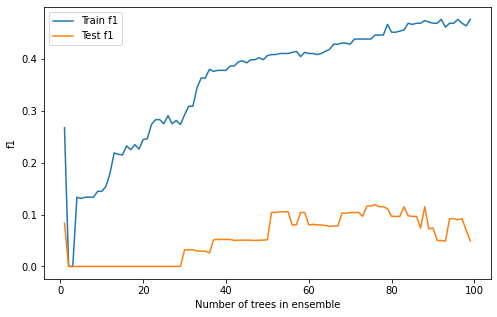

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(n_trees, train_f1, label='Train f1')
plt.plot(n_trees, test_f1, label='Test f1')
plt.xlabel('Number of trees in ensemble')
plt.ylabel('f1')
plt.legend();

In [32]:
print(max(test_f1),' - f1 on the test')

0.11904761904761904  - f1 on the test


# Decision Tree 

In [33]:
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier(max_depth=3)
clf.fit(X,Y)
y_pred = clf.predict(Xeval)

print(f1_score(Yeval.values, y_pred),' - f1 on the DTC')

0.06521739130434782  - f1 on the DTC


In [34]:
train_f1 = []
test_f1 = []

n_depth = range(5, 40)

for i in tqdm(n_trees):
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X,Y)
    
    y_pred_train = dtc.predict(X)
    y_pred_test = dtc.predict(Xeval)
    
    train_f1.append(f1_score(Y, y_pred_train))
    test_f1.append(f1_score(Yeval, y_pred_test))

100%|██████████████████████████████████████████████████████████████████████████████████| 99/99 [00:05<00:00, 17.89it/s]


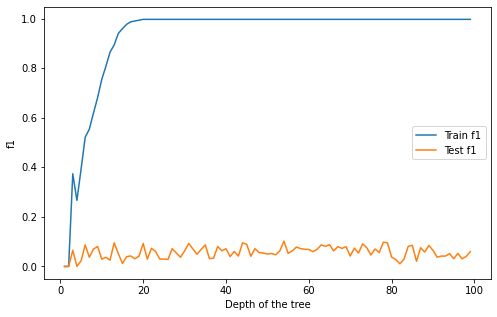

In [35]:
plt.figure(figsize=(8, 5))
plt.plot(n_trees, train_f1, label='Train f1')
plt.plot(n_trees, test_f1, label='Test f1')
plt.xlabel('Depth of the tree')
plt.ylabel('f1')
plt.legend();

In [36]:
print(max(test_f1),' - f1 on the test')

0.10212765957446808  - f1 on the test


# XGBoost

In [37]:
import xgboost as xgb

train_f1 = []
test_f1 = []

n_trees = range(5, 80)

for i in tqdm(n_trees):
    grb = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = i)
    grb.fit(X,Y)
    
    y_pred_train = grb.predict(X)
    y_pred_test = grb.predict(Xeval)
    
    train_f1.append(f1_score(Y, y_pred_train))
    test_f1.append(f1_score(Yeval, y_pred_test))

100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:16<00:00,  4.56it/s]


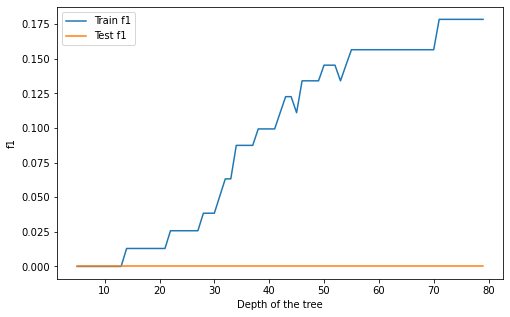

In [38]:
plt.figure(figsize=(8, 5))
plt.plot(n_trees, train_f1, label='Train f1')
plt.plot(n_trees, test_f1, label='Test f1')
plt.xlabel('Depth of the tree')
plt.ylabel('f1')
plt.legend();

In [39]:
print(max(test_f1),' - f1 on the test')

0.0  - f1 on the test


# LogisticRegression

In [40]:
from sklearn.linear_model import LogisticRegression
import numpy as np

cv = KFold(n_splits=5, shuffle=True,random_state=314)
clf = LogisticRegression(max_iter=5000)

params_grid = {
    'C': np.logspace(-9, 1, 30)
}

gs = GridSearchCV(clf, param_grid=params_grid, cv = cv)
gs.fit(X, Y)

y_pred_LR = gs.best_estimator_.predict(Xeval)
print(f1_score(y_pred_LR,Yeval))

0.07766990291262137


# Linear vector classifier

In [41]:
from sklearn.svm import LinearSVC

cv = KFold(n_splits=5, shuffle=True,random_state=314)
clf = LinearSVC()
params_grid = {
    'penalty':['l1', 'l2'],
    'C': np.logspace(-9, 1, 30)
}

gs = GridSearchCV(clf, param_grid=params_grid, cv = cv)
gs.fit(X, Y)

round(f1_score(Yeval,gs.best_estimator_.predict(Xeval)),3)

0.0

# Random Forest classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

cv = KFold(n_splits=5, shuffle=True,random_state=314)
clf = RandomForestClassifier()
params_grid = {
    'n_estimators': range(10,200,10),
    'max_features':['sqrt', 'log2', None]
}
gs = GridSearchCV(clf, param_grid=params_grid, cv = cv)
gs.fit(X, Y)

round(f1_score(Yeval,gs.best_estimator_.predict(Xeval)),3)

0.0

In [44]:
X1, Y1 = create_data_split_from_month(user_x_activity, 1)
X2, Y2 = create_data_split_from_month(user_x_activity, 2)

X11, Y11 = create_data_split_from_month(user_x_activity, 11)
X12, Y12 = create_data_split_from_month(user_x_activity, 12) 

Xsum = pd.concat([X1,X2,X11,X12], ignore_index=True)
Ysum = pd.concat([Y1,Y2,Y11,Y12], ignore_index=True)

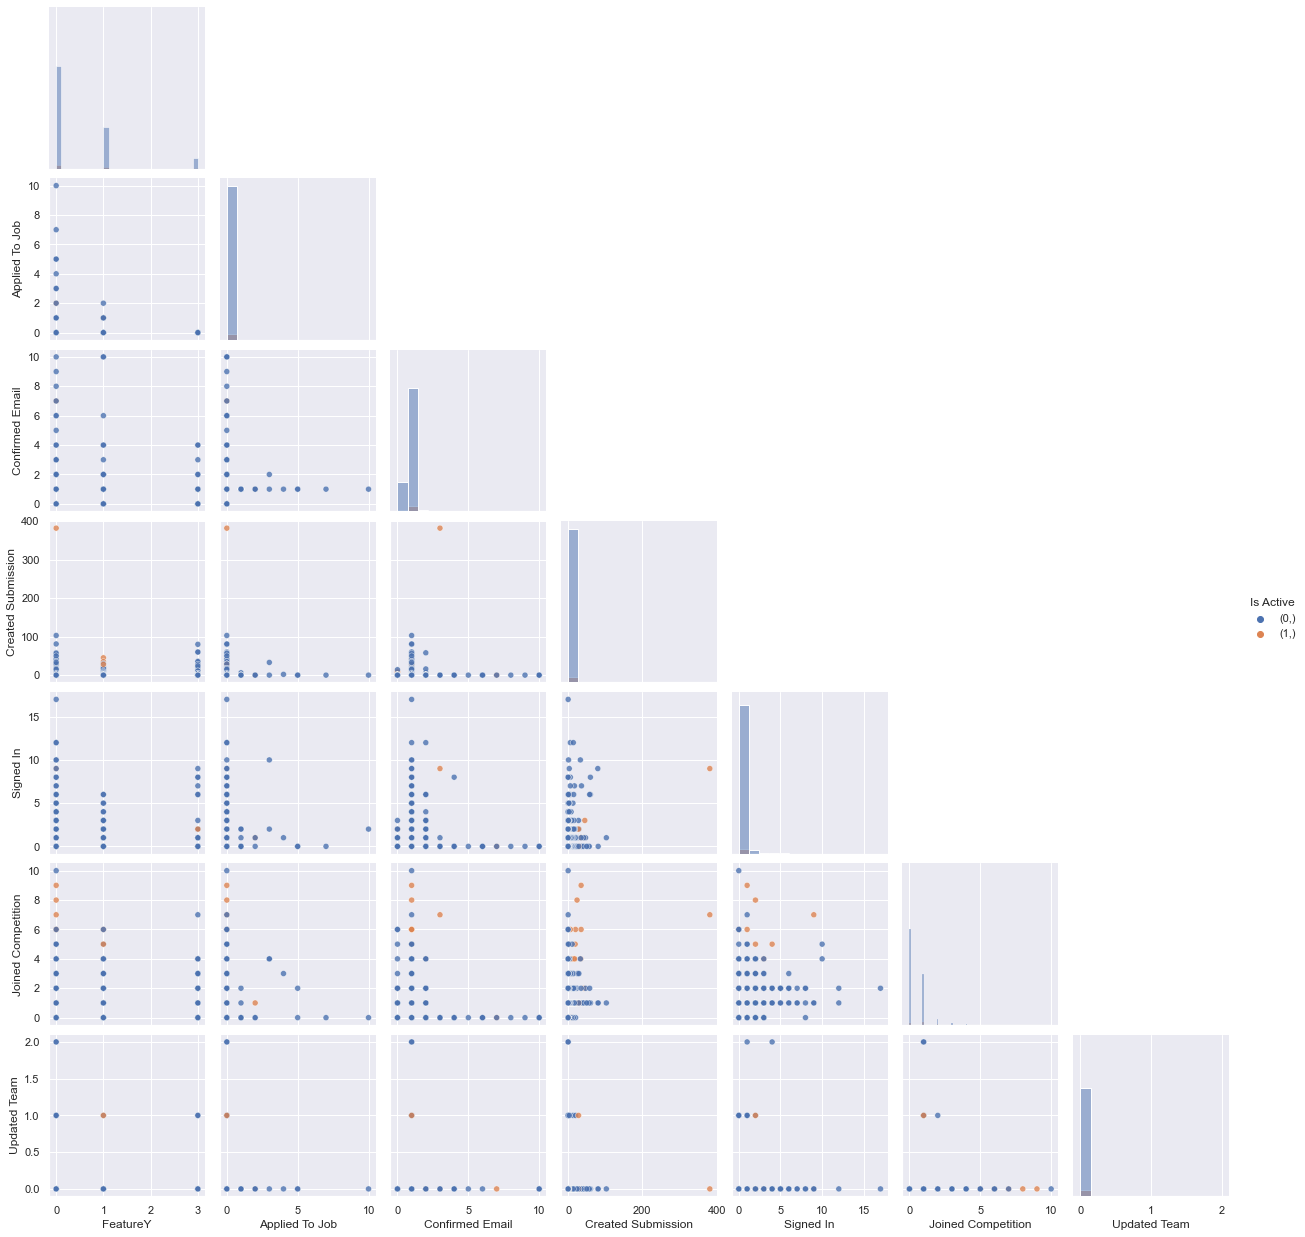

In [45]:
import seaborn as sns
sns.set()

ydf=pd.DataFrame({'Is Active': list(zip(*[Ysum+1-1]))})
df=pd.concat([Xsum, ydf], axis=1)
df.fillna(0)

temp=['FeatureY', 'Applied To Job', 'Confirmed Email', 'Created Submission','Signed In','Joined Competition','Updated Team','Is Active']
sns.pairplot(data=df[temp],  hue="Is Active",diag_kind="hist", corner=True,kind='scatter', plot_kws=dict(alpha=0.8));

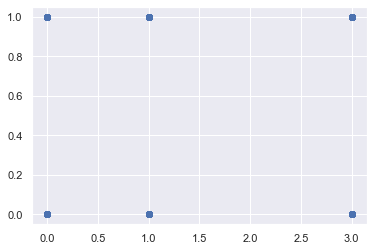

In [46]:
plt.scatter(Xsum['FeatureY'],(Ysum+1-1))

In [50]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.
